<a href="https://colab.research.google.com/github/JoaoAlexandreFerreira/MDF/blob/main/Laminao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Tabela 5 (Sugestão): Verificação da Conservação de Volume ---
  Etapa  Volume (mm³)  Desvio Volumétrico (%)
Inicial       1831.73                     0.0
Passe 1       1831.74                     0.0
Passe 2       1831.71                    -0.0
Passe 3       1831.72                    -0.0

--- Tabela 6 (Sugestão): Análise das Deformações Verdadeiras ---
  Etapa  ε_espessura  ε_largura  ε_comprimento  Soma das Deformações (ε_total)
Passe 1       -0.048     -0.004          0.052                             0.0
Passe 2       -0.084     -0.002          0.086                            -0.0
Passe 3       -0.136      0.013          0.123                            -0.0


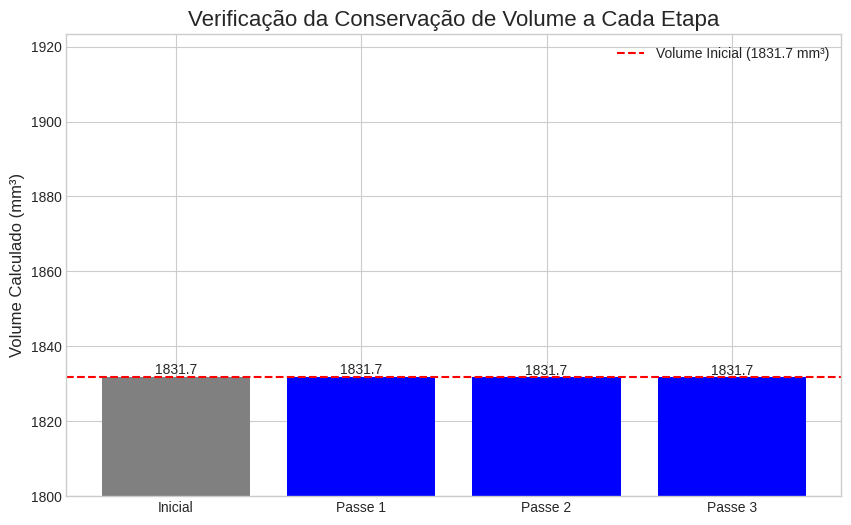

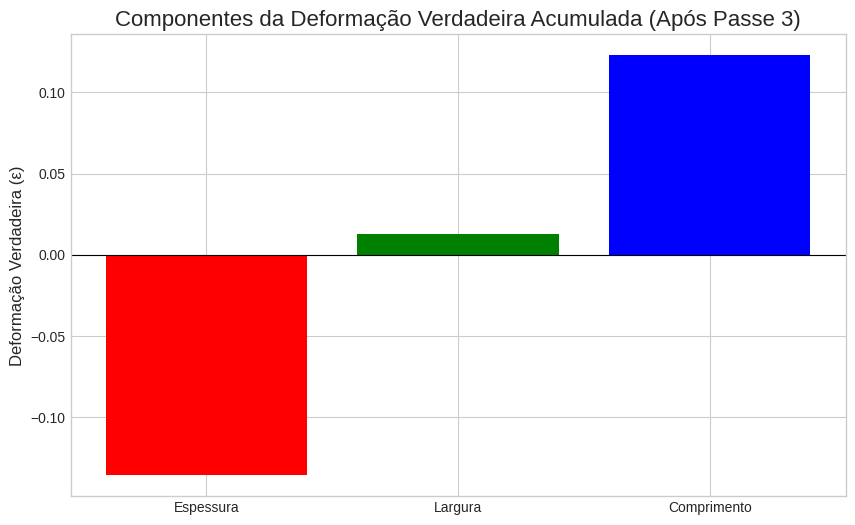

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

dados = {'Inicial': {'e': 3.23, 'L': 11.70, 'c': 48.47},
          'Passe 1': {'e': 3.08, 'L': 11.65, 'c': 51.049},
        'Passe 2': {'e': 2.97, 'L': 11.68, 'c': 52.803},
        'Passe 3': {'e': 2.82, 'L': 11.85, 'c': 54.814}}

resultados_volume = []
resultados_deformacao = []

e0, L0, c0 = dados['Inicial']['e'], dados['Inicial']['L'], dados['Inicial']['c']
volume_inicial = e0 * L0 * c0
resultados_volume.append({'Etapa': 'Inicial',
                          'Volume (mm³)': volume_inicial,
                          'Desvio Volumétrico (%)': 0.0})

for etapa, medidas in dados.items():
  if etapa == 'Inicial':
    continue

  ef, Lf, cf = medidas['e'], medidas['L'], medidas['c']

  # Cálculo de Volume
  volume_final = ef * Lf * cf
  desvio_vol = ((volume_final - volume_inicial) / volume_inicial) * 100
  resultados_volume.append({'Etapa': etapa,
                            'Volume (mm³)': volume_final,
                            'Desvio Volumétrico (%)': desvio_vol})

  # Cálculo das Deformações Verdadeiras
  epsilon_e = math.log(ef / e0)
  epsilon_L = math.log(Lf / L0)
  epsilon_c = math.log(cf / c0)
  soma_epsilon = epsilon_e + epsilon_L + epsilon_c
  resultados_deformacao.append({'Etapa': etapa,
                                'ε_espessura': epsilon_e,
                                'ε_largura': epsilon_L,
                                'ε_comprimento': epsilon_c,
                                'Soma das Deformações (ε_total)': soma_epsilon})


# --- 3. EXIBIÇÃO DOS RESULTADOS EM TABELAS ---
df_volume = pd.DataFrame(resultados_volume)
df_deformacao = pd.DataFrame(resultados_deformacao)

print("--- Tabela 5 (Sugestão): Verificação da Conservação de Volume ---")
print(df_volume.round(2).to_string(index=False))

print("\n--- Tabela 6 (Sugestão): Análise das Deformações Verdadeiras ---")
print(df_deformacao.round(3).to_string(index=False))

plt.style.use('seaborn-v0_8-whitegrid')

# Gráfico 1: Verificação da Constância do Volume
plt.figure(figsize=(10, 6))
bars = plt.bar(df_volume['Etapa'], df_volume['Volume (mm³)'], color=['gray', 'blue', 'blue', 'blue'])
plt.axhline(y=volume_inicial, color='r', linestyle='--', label=f'Volume Inicial ({volume_inicial:.1f} mm³)')
plt.title('Verificação da Conservação de Volume a Cada Etapa', fontsize=16)
plt.ylabel('Volume Calculado (mm³)', fontsize=12)
plt.ylim(bottom=1800) # Ajuste o limite para melhor visualização da variação
plt.legend()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.1f}', va='bottom', ha='center') # Adiciona valor em cima da barra
plt.show()


# Gráfico 2: Componentes da Deformação Verdadeira no Final do Processo
deformacoes_finais = df_deformacao.iloc[-1] # Pega os dados do último passe
labels = ['Espessura', 'Largura', 'Comprimento']
valores = [deformacoes_finais['ε_espessura'], deformacoes_finais['ε_largura'], deformacoes_finais['ε_comprimento']]

plt.figure(figsize=(10, 6))
plt.bar(labels, valores, color=['red', 'green', 'blue'])
plt.axhline(y=0, color='black', linewidth=0.8)
plt.title('Componentes da Deformação Verdadeira Acumulada (Após Passe 3)', fontsize=16)
plt.ylabel('Deformação Verdadeira (ε)', fontsize=12)
plt.show()